# Propuesta del formateo de la Data

Evaluemos la data

In [26]:
# Import dependencies

import pandas as pd
import tabulate as tb
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import re

In [27]:
# Colors
colors = {
    'header': '\033[95m',
    'blue': '\033[94m',
    'green': '\033[92m',
    'warning': '\033[93m',
    'fail': '\033[91m',
    'end': '\033[0m',
}


In [28]:
# Obtain data from "establecimientos.csv"
collegeData = pd.read_csv("establecimientos.csv") 


# Descripción de Variables

Organizando las variables:

### Variables Descriptivas

| Variable         | Descripción                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------|
| Código           | Identifica de manera única a cada establecimiento. Es una variable cualitativa descriptiva única para cada establecimiento.                                  |
| Establecimiento  | Nombre del establecimiento educativo. Es una variable cualitativa descriptiva específica para cada establecimiento.                                             |
| Dirección        | Ubicación física del establecimiento. Es una variable cualitativa descriptiva que describe la dirección física del establecimiento.                           |
| Teléfono         | Número de teléfono del establecimiento. Es una variable cualitativa descriptiva que representa el contacto único de cada establecimiento.                      |
| Director         | Nombre del director del establecimiento. Es una variable cualitativa descriptiva que identifica al director del establecimiento.                                |

### Variables Categóricas

| Variable         | Descripción                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------|
| Distrito         | Clasifica el establecimiento dentro de un distrito específico. Es una variable cualitativa categórica que organiza los establecimientos por distrito.         |
| Departamento     | Indica el departamento donde se encuentra cada establecimiento. Es una variable cualitativa categórica que agrupa los establecimientos por región administrativa. |
| Municipio        | Define el municipio donde se localiza cada establecimiento. Es una variable cualitativa categórica que agrupa los establecimientos por ubicación administrativa más detallada. |
| Nivel            | Nivel educativo ofrecido por el establecimiento (ej. diversificado, primaria, etc.). Es una variable cualitativa categórica que clasifica el tipo de educación proporcionada. |
| Sector           | Tipo de sector educativo (ej. público, privado). Es una variable cualitativa categórica que especifica el tipo de administración del establecimiento educativo. |
| Área             | Área geográfica del establecimiento (ej. urbana, rural). Es una variable cualitativa categórica que describe la ubicación geográfica del establecimiento.       |
| Estado           | Estado actual del establecimiento (ej. abierto, cerrado). Es una variable cualitativa categórica que indica el estado operativo del establecimiento.         |
| Modalidad        | Modalidad de enseñanza ofrecida (ej. monolingüe, bilingüe). Es una variable cualitativa categórica que describe la metodología de enseñanza utilizada.      |
| Jornada          | Tipo de jornada educativa (ej. matutina, vespertina). Es una variable cualitativa categórica que especifica el horario de clases ofrecido por el establecimiento. |
| Plan             | Plan educativo implementado (ej. diario, semanal). Es una variable cualitativa categórica que describe la estructura temporal del plan de estudios.        |
| Departamental    | Departamento administrativo al que pertenece el establecimiento. Es una variable cualitativa categórica que clasifica el establecimiento según su dependencia administrativa. |
| Supervisor       | Nombre del supervisor del establecimiento. Es una variable cualitativa categórica que identifica al supervisor del establecimiento.                            |




In [29]:
# Create a list with describe columns
describeCols = ["CODIGO", "ESTABLECIMIENTO", "DIRECCION", "TELEFONO", "DIRECTOR" ]

# Create a list with categorical columns
categoricalCols = ["DISTRITO", "DEPARTAMENTO", "MUNICIPIO", "NIVEL", "SECTOR", "AREA", "STATUS", "MODALIDAD", "JORNADA", "PLAN", "DEPARTAMENTAL", "SUPERVISOR"]

# Empezemos probando algunas cosas
Tomando en cuenta lo anterior exploraremos:
 - La descripcion de la data.
 - Cuantos valores Nan hay por cada columna y cuanto representa.

## Descripcion de la data

Se hace uso de tablas con estadísticas descriptivas de la data. Dado que todas las variables son categoricas se busco:
1. El número de elementos de la columna.
2. El número de elementos únicos. 
3. El elemento más repetido (moda).
4. Y la frecuencia de la categoria más frecuente.

Aparte de eso nos interesa el numero de columnas y de filas que tiene nuestro dataframe (9354, 17).

In [30]:
# Describe the data using tabulate
# First divide columns on 4 groups to print
# them in a more readable way
print(colors['header'],"Describe data:", colors['end'])
# Show number of rows and columns
print(colors['blue'],"Number of rows and columns:", colors['end'], collegeData.shape)

# Print len of describeCols
print(colors['blue'],"Number of describe columns:", colors['end'], len(describeCols))

# Print len of categoricalCols
print(colors['blue'],"Number of categorical columns:", colors['end'],len(categoricalCols))

group_size = 3  # Len of groups to show
num_groups = len(categoricalCols) // group_size + (len(categoricalCols) % group_size > 0) # Number of groups

# Iterate over the groups and print the description
for i in range(num_groups):
    start = i * group_size
    end = (i + 1) * group_size
    group_cols = categoricalCols[start:end]    
    
    # Use .describe() to get the description of the columns
    description = collegeData[group_cols].describe()
    styler = description.style.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]}
    ])
    # Display the description
    display(styler)

 Describe data: 
 Number of rows and columns:  (9354, 17)
 Number of describe columns:  5
 Number of categorical columns:  12


,DISTRITO,DEPARTAMENTO,MUNICIPIO
count,9123,9331,9331
unique,690,23,349
top,01-403,CIUDAD CAPITAL,ZONA 1
freq,268,1564,633


,NIVEL,SECTOR,AREA
count,9331,9331,9331
unique,1,4,3
top,DIVERSIFICADO,PRIVADO,URBANA
freq,9331,7956,7606


,STATUS,MODALIDAD,JORNADA
count,9331,9331,9331
unique,4,2,6
top,ABIERTA,MONOLINGUE,DOBLE
freq,6545,9039,3037


,PLAN,DEPARTAMENTAL,SUPERVISOR
count,9331,9331,9122
unique,13,26,659
top,DIARIO(REGULAR),GUATEMALA NORTE,CARLOS HUMBERTO GONZALEZ DE LEON
freq,5721,1050,333


In [31]:
# Using describeCols

group_size = 3  # Len of groups to show
num_groups = len(describeCols) // group_size + (len(describeCols) % group_size > 0) # Number of groups

# Iterate over the groups and print the description
for i in range(num_groups):
    start = i * group_size
    end = (i + 1) * group_size
    group_cols = describeCols[start:end]
    
    # Use .describe() to get the description of the columns
    description = collegeData[group_cols].describe()
    styler = description.style.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]}
    ])
    display(styler)

,CODIGO,ESTABLECIMIENTO,DIRECCION
count,9331,9331,9280
unique,9331,5620,6084
top,19-11-0018-46,INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA,CABECERA MUNICIPAL
freq,1,332,270


,TELEFONO,DIRECTOR
count,8792,8434
unique,5460,4707
top,22067425,---
freq,21,83


In [32]:

print(colors['header'],"Top 5 values for each categorical column:", colors['end'])
# Create Frequency Table for categorical columns
for col in categoricalCols:
    data = {}
    for val in collegeData[col]:
        if val in data:
            data[val] += 1
        else:
            data[val] = 1

    # Sort the data
    data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    # Calculate Frequency on percentage
    total = sum(data.values())
    for key in data:
        percentaje = round((data[key] / total) * 100, 2)
        # Use only 2 decimal places
        data[key] = f"{data[key]} ({percentaje:2}%)"


    data = pd.DataFrame(data.items(), columns=[col, 'FREQUENCY'])
    data = data.reset_index(drop=True)
    data = data.head(5)
    # Print Column Name
    styler = data.style.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]}
    ])
    display(styler)


 Top 5 values for each categorical column: 


,DISTRITO,FREQUENCY
0,01-403,268 (2.87%)
1,nan,231 (2.47%)
2,11-017,176 (1.88%)
3,01-411,167 (1.79%)
4,05-033,167 (1.79%)


,DEPARTAMENTO,FREQUENCY
0,CIUDAD CAPITAL,1564 (16.72%)
1,GUATEMALA,1477 (15.79%)
2,ESCUINTLA,628 (6.71%)
3,SAN MARCOS,574 (6.14%)
4,HUEHUETENANGO,516 (5.52%)


,MUNICIPIO,FREQUENCY
0,ZONA 1,633 (6.77%)
1,MIXCO,428 (4.58%)
2,VILLA NUEVA,370 (3.96%)
3,QUETZALTENANGO,248 (2.65%)
4,RETALHULEU,185 (1.98%)


,NIVEL,FREQUENCY
0,DIVERSIFICADO,9331 (99.75%)
1,nan,23 (0.25%)


,SECTOR,FREQUENCY
0,PRIVADO,7956 (85.05%)
1,OFICIAL,990 (10.58%)
2,COOPERATIVA,245 (2.62%)
3,MUNICIPAL,140 (1.5%)
4,nan,23 (0.25%)


,AREA,FREQUENCY
0,URBANA,7606 (81.31%)
1,RURAL,1723 (18.42%)
2,nan,23 (0.25%)
3,SIN ESPECIFICAR,2 (0.02%)


,STATUS,FREQUENCY
0,ABIERTA,6545 (69.97%)
1,CERRADA TEMPORALMENTE,2663 (28.47%)
2,TEMPORAL TITULOS,120 (1.28%)
3,nan,23 (0.25%)
4,TEMPORAL NOMBRAMIENTO,3 (0.03%)


,MODALIDAD,FREQUENCY
0,MONOLINGUE,9039 (96.63%)
1,BILINGUE,292 (3.12%)
2,nan,23 (0.25%)


,JORNADA,FREQUENCY
0,DOBLE,3037 (32.47%)
1,VESPERTINA,2567 (27.44%)
2,MATUTINA,2382 (25.47%)
3,SIN JORNADA,964 (10.31%)
4,NOCTURNA,289 (3.09%)


,PLAN,FREQUENCY
0,DIARIO(REGULAR),5721 (61.16%)
1,FIN DE SEMANA,2328 (24.89%)
2,SEMIPRESENCIAL (FIN DE SEMANA),481 (5.14%)
3,SEMIPRESENCIAL (UN DÍA A LA SEMANA),398 (4.25%)
4,A DISTANCIA,143 (1.53%)


,DEPARTAMENTAL,FREQUENCY
0,GUATEMALA NORTE,1050 (11.23%)
1,GUATEMALA SUR,833 (8.91%)
2,GUATEMALA OCCIDENTE,785 (8.39%)
3,ESCUINTLA,628 (6.71%)
4,SAN MARCOS,574 (6.14%)


,SUPERVISOR,FREQUENCY
0,CARLOS HUMBERTO GONZALEZ DE LEON,333 (3.56%)
1,nan,232 (2.48%)
2,MIGUEL ANGEL ARMAS ROCHA,228 (2.44%)
3,JUAN ENRIQUE MARTINEZ SOLANO,167 (1.79%)
4,REMY ARTURO SINAY GUDIEL,167 (1.79%)


En base a lo anterior pudimos evaluar dos puntos claves:

1. En la data no se considera a la ciudad Capital como un municipio sino como un departamento. En pro de organizar mejor la data se actualizaran los datos para cada columna que tenga como departamento "CIUDAD CAPITAL" para que tomen el valor "GUATEMALA" como departamento y "CIUDAD CAPITAL" como municipio.
2. La naturaleza de la data hace que en la columna "NIVEL" solo se deba encontrar el valor "DIVERSIFICADO" lo cual vuelve redundante la columna y nos plantea el eliminarla.

In [33]:
# Chage "DEPARTAMENTO" into rows with "DEPARTAMENTo" == "CIUDAD CAPITAL" to "GUATEMALA" and "MUNICIPIO" to "CIUDAD CAPITAL"
collegeData.loc[collegeData['DEPARTAMENTO'] == "CIUDAD CAPITAL", 'MUNICIPIO'] = "GUATEMALA"
collegeData.loc[collegeData['DEPARTAMENTO'] == "CIUDAD CAPITAL", 'DEPARTAMENTO'] = "GUATEMALA"

# Delete rows with nan into "NIVEL"
collegeData = collegeData.dropna(subset=['NIVEL'])
# Delete column "NIVEL"
collegeData = collegeData.drop(columns=['NIVEL'])
# Delete NIVEL into categoricalCols
categoricalCols.remove("NIVEL")

## Evaluamos la cantidad de valores vacios dentro de la data.
Evaluar la presencia de datos vacíos en un DataFrame es esencial para garantizar la integridad y calidad de los análisis posteriores. Los datos faltantes pueden introducir sesgos, reducir la representatividad de los resultados. Identificar y tratar estos valores ausentes permite tomar decisiones informadas sobre cómo manejarlos, ya sea imputándolos, eliminándolos o utilizando técnicas avanzadas de modelado que pueden manejar datos incompletos.



NaN values for each column:


,COLUMN,MISSING DATA
0,CODIGO,0 (0.00%)
1,DISTRITO,208 (2.23%)
2,DEPARTAMENTO,0 (0.00%)
3,MUNICIPIO,0 (0.00%)
4,ESTABLECIMIENTO,0 (0.00%)
5,DIRECCION,51 (0.55%)
6,TELEFONO,539 (5.78%)
7,SUPERVISOR,209 (2.24%)
8,DIRECTOR,897 (9.61%)
9,SECTOR,0 (0.00%)




Total NaN rows: 1904 NaN values, 20.41% missing data

NaN values into categorical columns:

Total NaN rows: 417 NaN values, 4.47% missing data


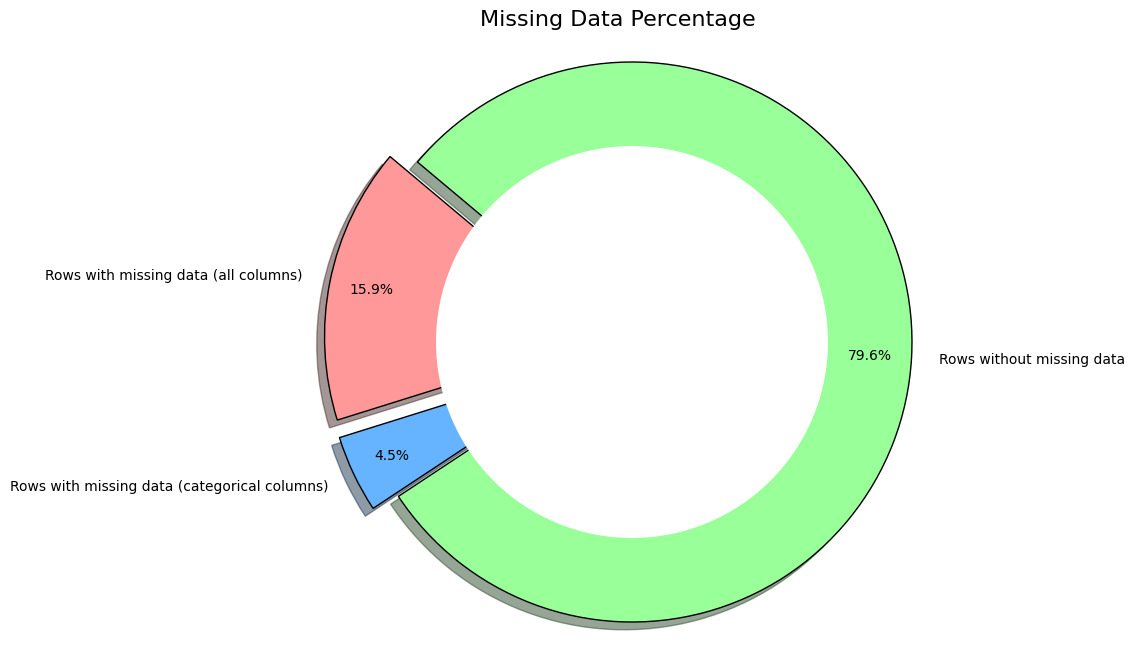

In [34]:
# Count how many NaN values are for each column and percentage to represent the missing data
dataMiss = {}
print("\n\nNaN values for each column:")
for col in collegeData.columns:
    # Count NaN values
    nanValues = collegeData[col].isnull().sum()
    # Using color blue to nan values
    nanValuesSTR = f"{nanValues}"
    # Calculate percentage of missing data
    percentage = nanValues / len(collegeData) * 100
    # Use color Yellow for percentage
    percentageStr = f"{percentage:.2f}%"
    # Print the result
    dataMiss[col] = f"{nanValuesSTR} ({percentageStr})"
    

dataMiss = pd.DataFrame(dataMiss.items(), columns=['COLUMN', 'MISSING DATA'])
dataMiss = dataMiss.reset_index(drop=True)
styler = dataMiss.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styler)

# Print Column Name


categoricalData = collegeData[categoricalCols] 
# Count all rows with 1 or more NaN values
nanRows = collegeData.isnull().sum(axis=1).sum()
# Calculate percentage of missing data
percentage = nanRows / len(collegeData) * 100
# Use color Yellow for percentage
percentageStr = f"\033[93m{percentage:.2f}%\033[0m"
# User color Red for  text Total NaN rows:
textPrint = "\033[91mTotal NaN rows:\033[0m"
# Use color blue for nan rows
nanRowsStr = f"\033[94m{nanRows}\033[0m"

# Print the result
print(f"\n\n{textPrint} {nanRowsStr} NaN values, {percentageStr} missing data")

# Count NaN values for each categorical column
print("\nNaN values into categorical columns:")
nanRows = categoricalData.isnull().sum(axis=1).sum()
percentageCat = nanRows / len(collegeData) * 100
# Use color Yellow for percentage
percentageStr = f"\033[93m{percentageCat:.2f}%\033[0m"
# User color Red for  text Total NaN rows:
textPrint = "\033[91mTotal NaN rows:\033[0m"
# Use color blue for nan rows
nanRowsStr = f"\033[94m{nanRows}\033[0m"
# Print the result
print(f"\n{textPrint} {nanRowsStr} NaN values, {percentageStr} missing data")

# Diference between percentaje to total data and categorical data
percentageNotNaN = 100 - percentage
percentageDiff = percentage - percentageCat
# Create a pie chart using percentage of missing data. Use percentageDiff and percentageCat
# to represent the data

# Datos para el gráfico
sizes = [percentageDiff, percentageCat, percentageNotNaN]
labels = ["Rows with missing data (all columns)", "Rows with missing data (categorical columns)", "Rows without missing data"]
colorsPie = ['#ff9999','#66b3ff','#99ff99']  # Colores personalizados
explode = (0.1, 0.1, 0)  # "Explota" la primera y la segunda porción

plt.figure(figsize=(8, 8))  # Tamaño de la figura

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colorsPie, autopct='%1.1f%%',
        shadow=True, startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

# Dibuja un círculo en el centro para hacer un "donut chart"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title("Missing Data Percentage", fontsize=16)

# Aspect ratio para asegurar que el gráfico es circular
plt.axis('equal')  

# Mostrar el gráfico
plt.show()


Evaluando los resultados, podemos notar que, en general, el 24.53% de las filas en el dataset tienen al menos un valor vacío. Este es un porcentaje considerablemente alto para ser ignorado o eliminado sin comprometer la integridad de los datos.

Sin embargo, si evaluamos solo las filas que tienen al menos un valor vacío en alguna columna categórica, el porcentaje disminuye, presentando un problema menor. Por lo tanto, para manejar los valores vacíos, se tomaron en cuenta los siguientes puntos:

1. **Columnas descriptivas únicas de cada establecimiento**: Las columnas no categóricas representan valores únicos y específicos de cada establecimiento, como el teléfono o el director. Estos valores no son útiles para realizar estadísticas y, por lo tanto, no afectan el análisis global.
2. **Porcentaje bajo de valores vacíos en columnas categóricas**: Dado que el porcentaje de valores vacíos en las filas de las columnas categóricas es menor al 5%, se consideró que este valor no es lo suficientemente significativo, lo que permite eliminarlos sin comprometer la integridad de los datos.

In [35]:
# Find rows with missing data into a categorical column and delete them into the original DataFrame
# Find rows with missing data into a categorical column
rows = collegeData[categoricalData.isnull().any(axis=1)]
# Delete rows with missing data into a categorical column
collegeData = collegeData.drop(rows.index)
collegeData.shape

(9122, 16)

In [55]:
# Using var ESTABLECIMIENTO to create a new column wit "TIPO_ESTABLECIMIENTO"
# Using regex to verify if the value is a "escuela", "colegio", "instituto", "liceo", "academia" or Other
variants = {
    "INSTITUTO": [
        "instituto",
        "insititucion",
        "instiuto",
        "institiuto",
        "inst."
    ],
    "ESCUELA": [
        "escuela",
        "centro escolar"
    ],
    "COLEGIO": [
        "colegio",
        "college"
    ],
    "LICEO": [
        "liceo",
    ],
    "ACADEMIA": [
        "academia",
        "academ"
    ],
}


# Funct to verify the type of establishment
def verifyType(establecimiento):
    establecimiento = establecimiento.lower()
    # Replace especial characters with tilde to normal characters
    establecimiento = establecimiento.replace("á", "a")
    establecimiento = establecimiento.replace("é", "e")
    establecimiento = establecimiento.replace("í", "i")
    establecimiento = establecimiento.replace("ó", "o")
    establecimiento = establecimiento.replace("ú", "u")

    # Using regex to verify the type of establishment
    for key, values in variants.items():
        for value in values:
            if re.search(value, establecimiento):
                return key
    return "OTRO"
    
# Create a new column with the type of establishment
collegeData["TIPO_ESTABLECIMIENTO"] = collegeData["ESTABLECIMIENTO"].apply(verifyType)

# Count the number of establishments for each
# type of establishment
data = {}
for val in collegeData["TIPO_ESTABLECIMIENTO"]:
    if val in data:
        data[val] += 1
    else:
        data[val] = 1

# Sort the data
data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Calculate Frequency on percentage
total = sum(data.values())
for key in data:
    percentaje = round((data[key] / total) * 100, 2)
    # Use only 2 decimal places
    data[key] = f"{data[key]} ({percentaje:2}%)"

data = pd.DataFrame(data.items(), columns=["TIPO_ESTABLECIMIENTO", "FREQUENCY"])
data = data.reset_index(drop=True)
# Print Column Name
styler = data.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styler)
    

,TIPO_ESTABLECIMIENTO,FREQUENCY
0,COLEGIO,3501 (38.38%)
1,INSTITUTO,2586 (28.35%)
2,LICEO,1500 (16.44%)
3,OTRO,1209 (13.25%)
4,ESCUELA,314 (3.44%)
5,ACADEMIA,12 (0.13%)


In [54]:
# Print ESTABLECIMIENTO and TIPO_ESTABLECIMIENTO for the first 5 rows where TIPO_ESTABLECIMIENTO is "OTRO"
print("\n\nESTABLECIMIENTO and TIPO_ESTABLECIMIENTO for the first 5 rows where TIPO_ESTABLECIMIENTO is 'OTRO':")
data = collegeData[collegeData["TIPO_ESTABLECIMIENTO"] == "OTRO"][["ESTABLECIMIENTO", "TIPO_ESTABLECIMIENTO"]]
# Sort the data by ESTABLECIMIENTO
data = data.sort_values(by="ESTABLECIMIENTO")
data = data.tail(5)
styler = data.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styler)



ESTABLECIMIENTO and TIPO_ESTABLECIMIENTO for the first 5 rows where TIPO_ESTABLECIMIENTO is 'OTRO':


,ESTABLECIMIENTO,TIPO_ESTABLECIMIENTO
7652,TECNOLÓGICO MODERNO CENTRO EDUCACIONAL,OTRO
540,TECNOLÓGICO PREUNIVERSITARIO,OTRO
585,TECNOLÓGICO PREUNIVERSITARIO,OTRO
774,"TÉCNICO INDUSTRIAL ""ALAN JUYU""",OTRO
6638,ZETH CENTRO EDUCATIVO,OTRO


### Por último se verifica si existen filas completamente duplicadas. 
Como no existen duplicados exactos, mejor evaluamos la información descritiva de los establecimientos. 

In [38]:
# Findo rows with all data on all columns are duplicated
duplicatedRows = collegeData[collegeData.duplicated()]
duplicatedRows

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL,TIPO_ESTABLECIMIENTO


La información descriptiva de los colegios es propia de cada establecimiento dado que cada uno es identifica por su código sin exepción alguna. Con el fin de evitar redundancia en los datos provocada por los datos descriptivos como el número de teléfono, la dirección, el director y el código. Se eliminaran estas variables y se dejara la variable código. El cual los representa a cada uno de forma única. 

In [39]:
# Find if exist ESTABLECIMIENTO with data not duplicated on data on columns describeCols. 
# Examples: CODIGO, DIRECCION, TELEFONO, DIRECTOR
duplicatedData = collegeData.duplicated(subset=['CODIGO'])
duplicatedData = collegeData[duplicatedData]
duplicatedData

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL,TIPO_ESTABLECIMIENTO
